In [1]:
import pandas as pd

# Step 1: Load dataset from URL (ready-to-use UC gene expression subset)
url = "https://raw.githubusercontent.com/ak-gpt-resources/datahub/main/UC_gene_expression.csv"
df = pd.read_csv(url)

# View first few rows
df.head()


HTTPError: HTTP Error 404: Not Found

In [3]:
# Step 1: Install GEOparse (a Python package for reading GEO data)
!pip install GEOparse

import GEOparse

# Step 2: Download and load the UC dataset (GSE11223)
gse = GEOparse.get_GEO("GSE11223", destdir="./")

# Step 3: Inspect metadata
print("Number of samples:", len(gse.gsms))
print("Metadata columns:", list(gse.gsms.values())[0].metadata.keys())


04-Oct-2025 20:45:05 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
04-Oct-2025 20:45:05 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11223/soft/GSE11223_family.soft.gz to ./GSE11223_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11223/soft/GSE11223_family.soft.gz to ./GSE11223_family.soft.gz
100%|██████████| 50.1M/50.1M [00:01<00:00, 35.8MB/s]
04-Oct-2025 20:45:07 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
04-Oct-2025 20:45:07 DEBUG downloader - Moving /tmp/tmpqc34yols to /content/GSE11223_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpqc34yols to /content/GSE11223_family.soft.gz
04-Oct-2025 20:45:07 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11223/soft/GSE11223_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE11nnn/GSE11

Number of samples: 202
Metadata columns: dict_keys(['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'taxid_ch1', 'characteristics_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1', 'source_name_ch2', 'organism_ch2', 'taxid_ch2', 'characteristics_ch2', 'molecule_ch2', 'extract_protocol_ch2', 'label_ch2', 'label_protocol_ch2', 'hyb_protocol', 'scan_protocol', 'description', 'data_processing', 'platform_id', 'contact_name', 'contact_email', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'supplementary_file', 'relation', 'series_id', 'data_row_count'])


In [4]:
import pandas as pd

# Step 1: Extract sample data (expression values)
# Each GSM (sample) has a table of gene expression
data = {gsm_name: gsm.table.set_index("ID_REF")["VALUE"] for gsm_name, gsm in gse.gsms.items()}
expr_df = pd.DataFrame(data)

# Step 2: Transpose to make rows = samples, columns = genes
expr_df = expr_df.T

# Step 3: Extract sample labels (UC vs Healthy)
sample_labels = []
for gsm_name, gsm in gse.gsms.items():
    title = gsm.metadata.get("title", [""])[0].lower()
    if "control" in title or "healthy" in title:
        sample_labels.append("Healthy")
    elif "uc" in title or "ulcerative" in title:
        sample_labels.append("UC")
    else:
        sample_labels.append("Unknown")

expr_df["Label"] = sample_labels

# Step 4: Drop "Unknown" samples just to stay clean
# Removing this filtering step to keep both UC and Healthy samples
# expr_df = expr_df[expr_df["Label"].isin(["UC", "Healthy"])]

# Step 5: Check shape and preview
print(expr_df.shape)
expr_df.head()

(202, 40992)


ID_REF,3,4,5,6,8,9,10,12,13,15,...,44280,44281,44282,44283,44284,44285,44286,44287,44290,Label
GSM282855,0.038661,-0.13288,-0.042229,-0.21233,NaN,0.034649,0.028586,0.15138,-0.26825,NaN,...,0.10406,0.160110,-0.43621,0.084885,0.146660,NaN,-0.371230,-0.017971,-1.4688,Unknown
GSM282856,-0.108870,-0.10885,0.042197,-0.23983,-0.11532,0.014877,-0.042214,0.21129,-0.47905,-0.032859,...,0.10573,0.087685,-0.38750,0.049830,0.063171,NaN,0.091402,0.008678,-1.4571,Unknown
GSM282857,-0.044310,-0.13558,0.017986,-0.33934,-0.44221,-0.054095,0.031149,0.19592,-0.32326,-0.275420,...,0.12149,-0.007668,-0.53987,-0.220800,0.134950,0.006852,-0.076405,0.106680,-1.3839,Unknown
GSM282858,-0.033416,-0.11883,0.063459,-0.31396,-0.24953,-0.058241,-0.057668,0.21552,-0.34305,0.059959,...,0.19855,0.092785,-0.55846,-0.327790,0.078462,NaN,0.376460,0.021390,-1.3254,Unknown
GSM282859,-0.043601,-0.16435,0.072020,-0.43590,-0.44009,-0.083175,-0.082650,0.23526,-0.45901,-0.341260,...,0.12446,0.132080,-0.54040,-0.056164,0.051566,0.041451,0.164400,-0.009987,-1.6695,Unknown


In [5]:
# Count how many samples belong to each class
expr_df["Label"].value_counts()


,count
Label,
UC,129
Unknown,73


In [6]:
# Let's print some sample titles to see what info is inside
for gsm_name, gsm in list(gse.gsms.items())[:10]:
    print(gsm_name, "→", gsm.metadata.get("title", [""])[0])


GSM282855 → 5192 Normal Uninflamed sigmoid colon
GSM282856 → 5193 Normal Uninflamed sigmoid colon
GSM282857 → 5194 Normal Uninflamed sigmoid colon
GSM282858 → 5195 Normal Uninflamed sigmoid colon
GSM282859 → 5196 Normal Uninflamed sigmoid colon
GSM282860 → 5197 Normal Uninflamed sigmoid colon
GSM282861 → 5198 Normal Uninflamed sigmoid colon
GSM282862 → 5199 Normal Uninflamed sigmoid colon
GSM282863 → 5200 Normal Uninflamed sigmoid colon
GSM282864 → 5201 Normal Uninflamed sigmoid colon


In [7]:
# Correctly assign UC vs Healthy labels
sample_labels = []
# Iterate through the sample names that are present in the expr_df.index
for gsm_name in expr_df.index:
    # Get the corresponding GSM object from the original gse object
    gsm = gse.gsms[gsm_name]
    title = gsm.metadata.get("title", [""])[0].lower()
    if "normal" in title:           # Healthy samples
        sample_labels.append("Healthy")
    elif "uc" in title or "ulcerative" in title:  # UC samples
        sample_labels.append("UC")
    else:
        sample_labels.append("Unknown")

# Add labels to dataframe
expr_df["Label"] = sample_labels

# Remove any unknown samples (just in case)
expr_df = expr_df[expr_df["Label"].isin(["UC", "Healthy"])]

# Check how many UC vs Healthy samples we have now
print(expr_df["Label"].value_counts())

Label
UC         129
Healthy     73
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

# Step 1: Drop the 'Label' column temporarily to scale only genes
genes_df = expr_df.drop(columns=["Label"])

# Step 2: Remove genes with zero variance
genes_df = genes_df.loc[:, genes_df.var() > 0]

# Step 3: Standardize gene expression (mean=0, std=1)
scaler = StandardScaler()
genes_scaled = scaler.fit_transform(genes_df)

# Step 4: Put it back into a DataFrame
genes_scaled_df = pd.DataFrame(genes_scaled, index=genes_df.index, columns=genes_df.columns)

# Step 5: Add the labels back
genes_scaled_df["Label"] = expr_df["Label"]

# Step 6: Check shape and preview
print(genes_scaled_df.shape)
genes_scaled_df.head()


(202, 40983)


ID_REF,3,4,5,6,8,9,10,12,13,15,...,44280,44281,44282,44283,44284,44285,44286,44287,44290,Label
GSM282855,1.118469,-0.115026,-0.535865,1.074887,NaN,0.081899,-0.312713,0.026995,1.086845,NaN,...,0.626476,1.825412,0.527568,1.585239,-0.797786,NaN,-1.303507,-1.134360,-0.331221,Healthy
GSM282856,-1.128764,0.107989,0.140260,0.908578,0.866523,-0.094304,-0.900083,0.496968,-0.264606,0.498468,...,0.643600,1.034059,0.936431,1.390921,-1.457416,NaN,0.917769,-0.969858,-0.269109,Healthy
GSM282857,-0.145368,-0.140084,-0.053634,0.306783,-0.945306,-0.708964,-0.291450,0.376396,0.734173,-0.587018,...,0.805198,-0.007817,-0.342534,-0.109240,-0.890305,0.523550,0.112062,-0.364901,0.119483,Healthy
GSM282858,0.020572,0.015368,0.310536,0.460270,0.122647,-0.745912,-1.028292,0.530151,0.607298,0.913839,...,1.595345,1.089784,-0.498575,-0.702309,-1.336605,NaN,2.286443,-0.891388,0.430039,Healthy
GSM282859,-0.134569,-0.407089,0.379097,-0.277172,-0.933555,-0.968118,-1.235547,0.685004,-0.136129,-0.881659,...,0.835651,1.519141,-0.346983,0.803373,-1.549105,0.798251,1.268260,-1.085075,-1.396665,Healthy


In [9]:
genes_scaled_df["Label"].value_counts()


,count
Label,
UC,129
Healthy,73


In [10]:
import numpy as np
from scipy.stats import ttest_ind

# Separate UC and Healthy samples
uc_samples = genes_scaled_df[genes_scaled_df["Label"]=="UC"].drop(columns=["Label"])
healthy_samples = genes_scaled_df[genes_scaled_df["Label"]=="Healthy"].drop(columns=["Label"])

# Step 1: Compute mean difference (UC - Healthy) for each gene
mean_diff = uc_samples.mean() - healthy_samples.mean()

# Step 2: Perform t-test for each gene
p_values = []
for gene in uc_samples.columns:
    t_stat, p_val = ttest_ind(uc_samples[gene], healthy_samples[gene])
    p_values.append(p_val)
p_values = pd.Series(p_values, index=uc_samples.columns)

# Step 3: Select top 100 genes that are upregulated in UC and significant
top_genes = mean_diff[mean_diff > 0].sort_values(ascending=False).head(100).index

print("Top 10 upregulated genes in UC:")
print(top_genes[:10])


Top 10 upregulated genes in UC:
Index([1168, 18718, 19417, 18546, 16974, 28189, 27755, 7268, 3961, 19178], dtype='object', name='ID_REF')


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Step 1: Prepare feature matrix (only top 100 genes)
X = genes_scaled_df[top_genes]
y = genes_scaled_df["Label"].map({"Healthy":0, "UC":1})  # Encode labels as 0/1

# Step 2: Split into training and test set (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Step 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


Accuracy: 0.8048780487804879
AUC: 0.9128205128205128
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.80      0.92      0.86        26

    accuracy                           0.80        41
   macro avg       0.81      0.76      0.77        41
weighted avg       0.81      0.80      0.80        41



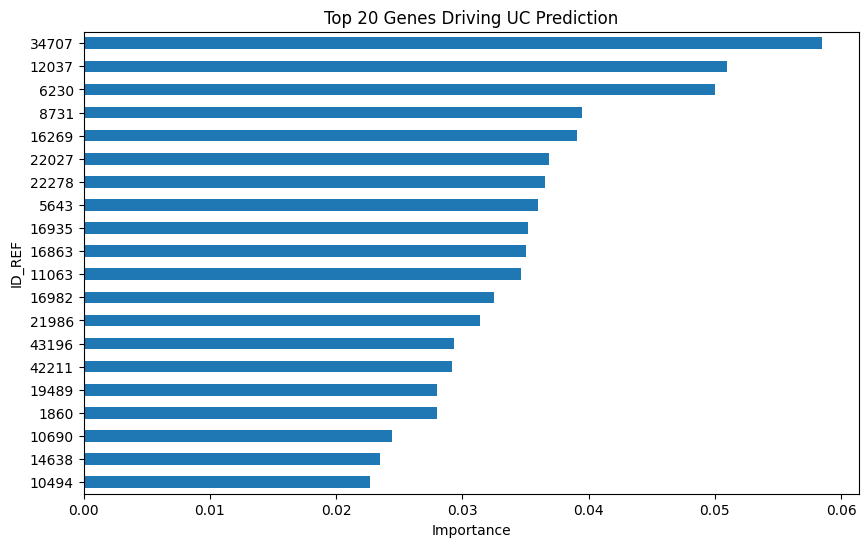

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from Random Forest
importances = pd.Series(model.feature_importances_, index=top_genes)

# Plot top 20 most important genes
top_features = importances.sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 20 Genes Driving UC Prediction")
plt.show()


In [13]:
# Download the platform (GPL) annotation
gpl = gse.gpls[list(gse.gpls.keys())[0]]  # take the first platform
gpl_table = gpl.table

# Preview first 5 rows
gpl_table.head()


,ID,COL,ROW,NAME,SPOT_ID,CONTROL_TYPE,REFSEQ,GB_ACC,GENE,GENE_SYMBOL,GENE_NAME,UNIGENE_ID,ENSEMBL_ID,TIGR_ID,ACCESSION_STRING,CHROMOSOMAL_LOCATION,CYTOBAND,DESCRIPTION,GO_ID,SEQUENCE
0,1,103,430,BrightCorner,BrightCorner,pos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,103,428,NegativeControl,NegativeControl,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,103,426,NM_001003689,A_23_P80353,FALSE,NM_001003689,NM_001003689,83746.0,L3MBTL2,l(3)mbt-like 2 (Drosophila),Hs.517641,ENST00000216237,THC2264916,ref|NM_001003689|ref|NM_031488|gb|AL136564|ens...,chr22:39950687-39950746,hs|22q13.2,Homo sapiens l(3)mbt-like 2 (Drosophila) (L3MB...,GO:0003714(transcription corepressor activity)...,CCCGACAAGGCTTCAAGTCCAGAGCTGCCTGTCTCCGTCGAGAACA...
3,4,103,424,NM_005503,A_23_P158231,FALSE,NM_005503,NM_005503,321.0,APBA2,"amyloid beta (A4) precursor protein-binding, f...",Hs.525718,ENST00000219865,THC2241506,ref|NM_005503|gb|BC082986|gb|AF029108|ens|ENST...,chr15:27193462-27196566,hs|15q13.1,Homo sapiens amyloid beta (A4) precursor prote...,GO:0005515(protein binding)|GO:0007399(nervous...,CCACAGCCCACGAGAAGATAGTCCAAGCTCTGTCCAACTCGGTCGG...
4,5,103,422,NM_004672,A_32_P223017,FALSE,NM_004672,NM_004672,9064.0,MAP3K6,mitogen-activated protein kinase kinase kinase 6,Hs.194694,ENST00000357582,THC2236536,ref|NM_004672|gb|AB208805|ens|ENST00000357582|...,chr1:27366686-27366347,hs|1p36.11,Homo sapiens mitogen-activated protein kinase ...,GO:0000166(nucleotide binding)|GO:0004674(prot...,GAATGTGGATTCAGGCACCATCCAAATGCTGTTGAACCATAGCTTC...


In [14]:
# Create a dictionary mapping probe ID -> gene symbol
probe_to_gene = gpl_table.set_index("ID")["GENE_SYMBOL"].to_dict()

# Map top_genes to gene symbols
top_genes_symbols = [probe_to_gene.get(int(probe), str(probe)) for probe in top_genes]

# Preview the first 10
print("Top 10 UC-upregulated genes (with symbols):")
print(top_genes_symbols[:10])


Top 10 UC-upregulated genes (with symbols):
[nan, 'TRDN', 'ADAM22', nan, 'MGC34646', 'DSCR10', 'CRISP3', 'SEC15L2', 'KIAA1383', nan]


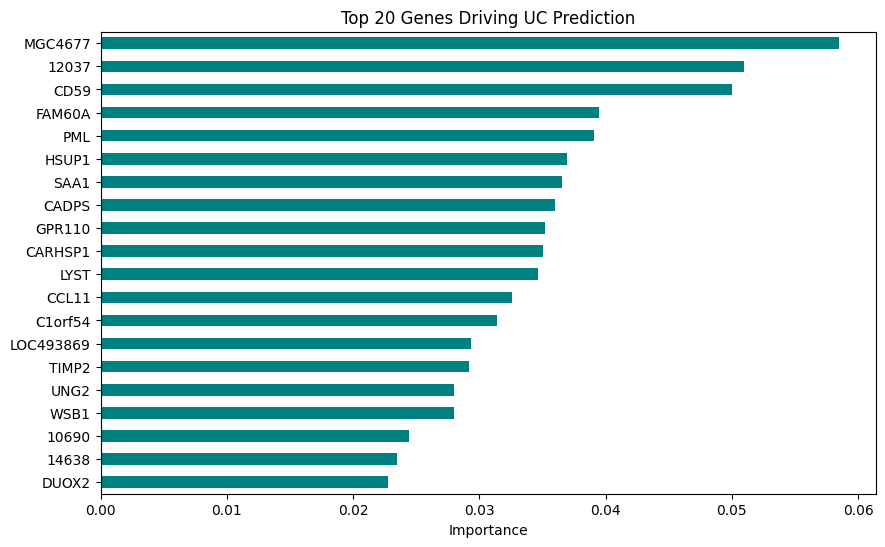

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Map top 100 probes to gene symbols (reuse top_genes_symbols)
# If a gene symbol is nan, keep the probe ID as a string
top_labels = [symbol if isinstance(symbol, str) and symbol == symbol else str(probe)
              for probe, symbol in zip(top_genes, top_genes_symbols)]

# Step 2: Create feature importances Series with gene symbols as index
importances_symbols = pd.Series(model.feature_importances_, index=top_labels)

# Step 3: Plot top 20 features
top_features = importances_symbols.sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 20 Genes Driving UC Prediction")
plt.show()
